***Run this before any other code:***

In [ ]:
!pip install qiskit==0.27 seaborn==0.10 ipywidgets==7.5.1 pylatexenc git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
from IPython.display import clear_output
clear_output()
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

# ***The Qubit, and Single Qubit Gates***

The Qubit
$$
|\psi\rangle=\alpha|0\rangle+\beta|1\rangle
$$
# **1.1 The Qubit** 
Bits and Qubits as Vector Spaces
All the hard work is done. You have mastered the math, spin-physics and computational quantum mechanics needed to begin "doing" quantum computer science.
While useful to our understanding of quantum mechanics, the spin- $1 / 2$ physical system, $\mathscr{S}$, is no longer useful to us as computer scientists. We will work entirely inside its state space $\mathcal{H}$ from this point forward, applying the postulates and traits of quantum mechanics directly to that abstract system, indifferent to the particular $\mathscr{S}$ that the Hilbert space $\mathcal{H}$ is modeling.

Although in practical terms a quantum bit, or qubit, is a variable superposition of two basis states in $\mathcal{H}$ of the form shown at the top of this chapter, formally qubits as well as classical bits - are actually vector spaces. You read that correctly. A single qubit is not a vector, but an entire vector space. We'll see how that works shortly.
To get oriented, we'll do a quick review of classical bits in the new formalism, then we'll retrace our steps for qubits. Let's jump in.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In order to study the qubit, let's establish a linguistic foundation by defining the more familiar classical bit.
212

# **Folksy Definition of a Bit**

Here's one possible way to define a bit without "going formal."

**A Bit (Informal)**. A "**bit**" is an entity, $x$, capable of being in one  of two states which we label "0" and "1."

The main take-away is that 0 and 1 are not bits. They are the values or states that the bit can attain.
We can use the notation
$$
x=0
$$
to mean that $"x$ is in the state $0,"$ an observation (or possibly a question) about the state bit $x$ is in. We also use the same notation to express the imperative, "put $x$ into the state $0 . "$ The latter is the programmer's assignment statement.

# **Folksy Definition of a Logical Operator a.k.a. Gate**

What about the logical operators like AND or XOR which transform bits to other bits? We can define those, too, using similarly loose language.

**Classical Logical (Boolean) Operator**. A logical operator is a function that takes one or more bits as input and produces a single bit as output.

Logical operators are also called logic gates - or just gates - when implemented in circuits diagrams.

*Note*: *We are only considering functions that have a single output bit. If one wanted to build a logic gate with multiple output bits it could be done by combining several single-output logic gates, one for each output bit.*

# **Examples of Logical Operators**

The Negation Operator. NOT (symbol $\neg$ ) is a logical operator on a single bit defined by the formula
$$
\neg x \equiv \begin{cases}0, & \text { if } x=1 \text { and } \\ 1, & \text { otherwise }\end{cases}
$$
A common alternate notation for the NOT operator is the "overline," $\bar{x}=\neg x$.
The Exclusive-Or Operator. XOR (symbol $\oplus$ ) is an operator on two bits defined by the formula
$$
x \oplus y \equiv \begin{cases}0, & \text { if } \quad x=y \text { and } \\ 1, & \text { otherwise }\end{cases}
$$

# **Case Study - Our First Quantum Gate, QNOT**


We'll examine every angle of this first example. It is precisely because of its simplicity that we can easily see the important differences between classical and quantum computational logic.
The Quantum NOT (or QNOT) Operator, $X$
The QNOT operator swaps the amplitudes of any state vector. It corresponds to
$$
\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)
$$
the same matrix that represents the NOT operator, $\neg$, of classical computing. The difference here is not in the operator but in the vast quantity of qubits to which we can apply it. Using $|\psi\rangle=(\alpha, \beta)^{t}$, as we will for this entire lecture, we find
$$
X|\psi\rangle=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{l}
\alpha \\
\beta
\end{array}\right)=\left(\begin{array}{l}
\beta \\
\alpha
\end{array}\right)
$$
In the special case of a CBS ket, we find that this does indeed change the state from $|0\rangle$ to $|1\rangle$ and vice versa.
[Exercise. Using the formula, verify that $X|0\rangle=|1\rangle$ and $X|1\rangle=|0\rangle$.] 

**Notation and Vocabulary:**

The $X$ operator is sometimes called the bit flip operator, because it "flips" the CBS coefficients, $\alpha \leftrightarrow \beta .$ In the special case of a pure CBS input, like $|0\rangle$, it "flips" it to the other $\mathrm{CBS},|1\rangle$

The reason QNOT is usually labeled using the letter $X$ is that, other than the factor of $\frac{h}{2}$, the matrix is the same as the spin-1/2 observable $S_{x}$. In fact, you'll recall from the quantum mechanics lesson that QNOT is precisely the Pauli spin matrix in the $x$-direction,
$$
X=\sigma_{x} \quad=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)
$$
It's best not to read anything too deep into this. The matrix that models an observable is used differently than one that performs a reversible operation on a qubit. Here, we are swapping amplitudes and therefore negating computational basis states. That's the important take-away.


# **Gate Symbol and Circuits**

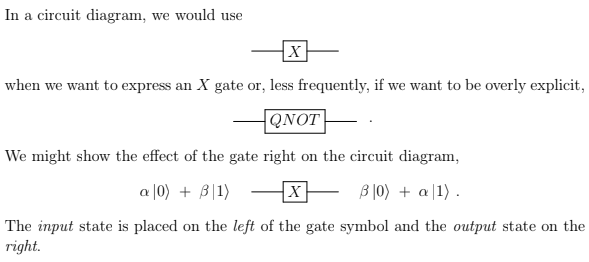

# **1.2** **The Hadamard Gate**, $H$

While all these quantum gates are essential, the one having the most far-reaching consequences and personifying the essence of quantum logic is the Hadamard gate.
The Hadamard operator, $H$, is defined by the matrix
$$
\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$$
Traditionally, we first address its effect on the CBS states,
$$
\begin{aligned}
&H|0\rangle=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)\left(\begin{array}{l}
1 \\
0
\end{array}\right)=\frac{|0\rangle+|1\rangle}{\sqrt{2}} \quad \text { and } \\
&H|1\rangle=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)\left(\begin{array}{l}
0 \\
1
\end{array}\right)=\frac{|0\rangle-|1\rangle}{\sqrt{2}}
\end{aligned}
$$
We immediately recognize that this "rotates" the $z$-basis kets onto the $x$-basis kets,

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below ($H$ in this case is unitary):

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

You can play around with these gates using the widget below:

In [ ]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

### Quick Exercise
1. Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.
2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).

# **$H$ of a General State**

This is to be extended to an arbitrary state, $|\psi\rangle$, using the obvious rules. Rather than approach it by expanding $|\psi\rangle$ along the $z$-basis then extending linearly, it's perhaps faster to view everything in terms of matrices and column vectors,
$$
H|\psi\rangle=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)\left(\begin{array}{l}
\alpha \\
\beta
\end{array}\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{c}
\alpha+\beta \\
\alpha-\beta
\end{array}\right)
$$
which can be grouped
$$
H|\psi\rangle=\left(\frac{\alpha+\beta}{\sqrt{2}}\right)|0\rangle+\left(\frac{\alpha-\beta}{\sqrt{2}}\right)|1\rangle
$$




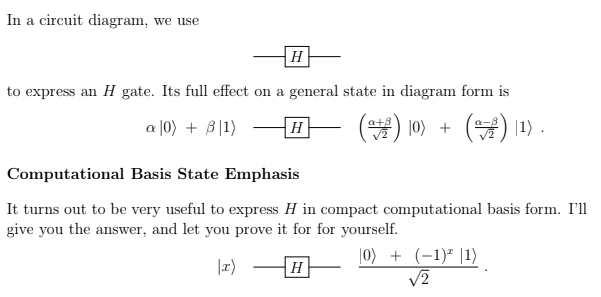

# **1. The Pauli Gates <a id="pauli"></a>**
You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

# **The X-Gate <a id="xgate"></a>**
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>Reminder: Multiplying Vectors by Matrices (Click here to expand)</summary>
  <p>Matrix multiplication is a generalisation of the inner product we saw in the last chapter. In the specific case of multiplying a vector by a matrix (as seen above), we always get a vector back:
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  In quantum computing, we can write our matrices in terms of basis vectors:
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  This can sometimes be clearer than using a box matrix as we can see what different multiplications will result in:
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  In fact, when we see a ket and a bra multiplied like this:
  $$ |a\rangle\langle b| $$
  this is called the <i>outer product</i>, which follows the rule:
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0 & a_0 b_1 & \dots  & a_0 b_n\\ 
              a_1 b_0 & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0 & \dots   & \dots  & a_n b_n \\
      \end{bmatrix}
  $$
  We can see this does indeed result in the X-matrix as seen above:
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

In Qiskit, we can create a short circuit to verify this:

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

Let's see the result of the above circuit. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

# **1. The Y & Z-gates  <a id="ynzgatez"></a>**
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

##**The U-gate**

<a id="generalU"></a>

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general P-gate. In the same way, the U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U(\theta,\phi,\lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

In [ ]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw('mpl')

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. Qiskit also provides the X equivalent of the S and Sdg-gate i.e. the SX-gate and SXdg-gate respectively. These gates do a quarter-turn with respect to the X-axis around the Block sphere and are a special case of the R<sub>x</sub>-gate.


Before running on real IBM quantum hardware, all single-qubit operations are compiled down to $I$ , $X$, $SX$ and $R_{z}$ . For this reason they are sometimes called the _physical gates_.

# **The Bloch Sphere**
**Introduction**

Our goal is to find a visual 3 -D representation for the qubits in $\mathcal{H}$. To that end, we will briefly allude to the lecture on quantum mechanics.

If you studied the optional time evolution of a general spin state corresponding to a special physical system - an electron in constant magnetic field $\mathbf{B}$ - you learned that the expectation value of all three observables formed a real 3 -D time-evolving vector,
$$
\mathbf{s}(t) \equiv\left(\begin{array}{c}
\left\langle S_{x}\right\rangle_{|\psi(t)\rangle} \\
\left\langle S_{y}\right\rangle_{|\psi(t)\rangle} \\
\left\langle S_{z}\right\rangle_{|\psi(t)\rangle}
\end{array}\right)
$$
which precesses around the direction of $\mathbf{B}$.
Do Not Panic. You don't have to remember or even re-study that section. This is merely a reference in case you want to connect that material with the following, which is otherwise self-contained.

The time evolution started out in an initial spin state at time $t=0$, and we followed its development at later times. However, today, we need only consider the fixed state at its initial time. No evolution is involved.

With that scary introduction, let's calmly look at any general state's expansion. along the preferred CBS,
$$
|\psi\rangle=c_{1}|0\rangle+c_{2}|1\rangle
$$
# **Rewriting $|\psi\rangle$**
We start by finding a more informative representation of $|\psi\rangle .$ First, express $c_{1}$ and $c_{2}$ in polar form, giving the equivalent state
$$
|\psi\rangle=\left(\begin{array}{l}
c e^{i \phi_{1}} \\
s e^{i \phi_{2}}
\end{array}\right)
$$
Then multiply by the unit scalar $e^{-i\left(\frac{\phi_{1}+\phi_{2}}{2}\right)}$ to get a more balanced equivalent state,
$$
|\psi\rangle=\left(\begin{array}{c}
c e^{i\left(\frac{\phi_{1}-\phi_{2}}{2}\right)} \\
\left.s e^{-i\left(\frac{\phi_{1}-\phi_{2}}{2}\right)}\right)
\end{array}\right)
$$
Now, simplify by making the substitution
$$
\phi=\frac{\phi_{1}-\phi_{2}}{2}
$$

# **Definition of the Bloch Sphere**
The sphere in $\mathbb{R}^{3}$ defined by
$$
\{\hat{\mathbf{n}}|| \hat{\mathbf{n}} \mid=1\}
$$
is called the Bloch sphere when the coordinates of each point on the sphere $\hat{\mathbf{n}}=$ $(x, y, z)^{t}$ are interpreted as the three expectation values $\langle X\rangle,\langle Y\rangle$ and $\langle Z\rangle$ for some qubit state, $|\psi\rangle .$ Each qubit value, $|\psi\rangle$, in $\mathcal{H}$ corresponds to a point $\hat{\mathbf{n}}$ on the Bloch sphere.

If we use spherical coordinates to represent points on the sphere, then $\hat{\mathbf{n}}=$ $(1, \theta, \phi)^{t}$ corresponds to the $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ in our Hilbert space $\mathcal{H}$ according to
$$
\hat{\mathbf{n}}=\left(\begin{array}{l}
1 \\
\theta \\
\phi
\end{array}\right)_{\mathrm{Sph}} \in \text { Bloch sphere } \longleftrightarrow|\psi\rangle=\left(\begin{array}{c}
\cos \left(\frac{\theta}{2}\right) e^{-i \phi} \\
\sin \left(\frac{\theta}{2}\right) e^{i \phi}
\end{array}\right) \in \mathcal{H}
$$
Now we see that a polar angle, $\theta$, of a point on the Bloch sphere gives the magnitudes of its corresponding qubit coordinates, but not directly; when $\theta$ is the polar angle, $\theta / 2$ is used (through sine and cosine) for the qubit coordinate magnitudes.